<a href="https://colab.research.google.com/github/LUCASDNORONHA/FacialRecognition-YaleFaceDatabasel./blob/main/FacialRecognition_YaleFaceDatabasel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visão Computacional: Reconhecimento Facial

In [59]:
import numpy as np
import zipfile
import os
import cv2

from PIL import Image
from google.colab import drive
from google.colab.patches import cv2_imshow

from PIL import Image
import matplotlib.pyplot as plt

## Carregando Dados

A base de dados Yale Face, também conhecida como Yale Face Database, é um conjunto de dados amplamente utilizado em reconhecimento facial. Ele contém imagens de faces de indivíduos coletadas sob diferentes condições de iluminação, expressões faciais e fundos. Essa diversidade nas condições ajuda a melhorar a robustez dos algoritmos de reconhecimento facial.

A Yale Face Database foi criada pela Yale Center for Computational Vision and Control, e uma das versões mais conhecidas é a Yale Face Database A. Esta versão inclui imagens de 15 indivíduos, cada um exibindo diversas expressões faciais e poses, totalizando 165 imagens. Cada imagem tem uma resolução relativamente baixa (por exemplo, 320x243 pixels).

Essa base de dados tem sido amplamente utilizada em pesquisas e avaliações de algoritmos de reconhecimento facial, permitindo que pesquisadores desenvolvam e testem novos métodos em condições variadas.

Se você estiver usando a base de dados Yale Face em seus projetos, é importante citar a fonte corretamente e respeitar os termos de uso, se houver. Certifique-se de verificar a documentação específica da versão da base de dados que você está utilizando para obter informações detalhadas sobre as condições de captura das imagens e outros detalhes relevantes.

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/yalefaces.zip'

zip_obj = zipfile.ZipFile(file=path, mode='r')
zip_obj.extractall('./')
zip_obj.close()

## Carregando e Pré-processando as Imagens para o Treinamento do Modelo de Reconhecimento Facial

In [4]:
os.listdir('/content/yalefaces/train')

['subject04.noglasses.gif',
 'subject09.glasses.gif',
 'subject01.surprised.gif',
 'subject02.sad.gif',
 'subject02.happy.gif',
 'subject04.normal.gif',
 'subject11.normal.gif',
 'subject11.wink.gif',
 'subject03.sleepy.gif',
 'subject14.surprised.gif',
 'subject04.sad.gif',
 'subject04.happy.gif',
 'subject02.noglasses.gif',
 'subject13.noglasses.gif',
 'subject13.surprised.gif',
 'subject02.glasses.gif',
 'subject15.leftlight.gif',
 'subject01.rightlight.gif',
 'subject14.leftlight.gif',
 'subject05.happy.gif',
 'subject07.glasses.gif',
 'subject07.noglasses.gif',
 'subject06.centerlight.gif',
 'subject10.rightlight.gif',
 'subject03.wink.gif',
 'subject10.noglasses.gif',
 'subject15.surprised.gif',
 'subject15.sleepy.gif',
 'subject09.leftlight.gif',
 'subject13.leftlight.gif',
 'subject01.normal.gif',
 'subject05.leftlight.gif',
 'subject14.rightlight.gif',
 'subject08.glasses.gif',
 'subject06.glasses.gif',
 'subject10.glasses.gif',
 'subject07.rightlight.gif',
 'subject09.happy.g

In [6]:
def Image_Info():
  images_paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for path in images_paths:
    if path == '/content/yalefaces/train//.ipnb_checkpoints':
      continue

    image = Image.open(path).convert('L')
    image_array = np.array(image, 'uint8')

    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(image_array)


  return np.array(ids), faces

In [7]:
ids, faces = Image_Info()

In [8]:
print(ids)

[ 4  9  1  2  2  4 11 11  3 14  4  4  2 13 13  2 15  1 14  5  7  7  6 10
  3 10 15 15  9 13  1  5 14  8  6 10  7  9 14  3  6 14 12  6  7  5 15 13
  8 10 10 15 12  8  1  8 14 14 12  5  6  4  3  1 11  4  4  9 10 14  5 11
  4 13  9  1  5  3 11  9  1  8  7  8  3  8  5 12  4 12 15 15 11  7 12 13
 10  6 15 11  6  3  2  2 12  8  3  7  7  2  2 13  5 10  5  8 13  6  7 12
  9 13 14  6  3  9 11  1  1 15  2  9 12 10 11]


In [9]:
print(faces)

[array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 235, 246, 250],
       [255, 255, 255, ..., 209, 216, 228],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 229, 196, 199],
       [255, 255, 255, ..., 227, 194, 197],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 253, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[109, 111, 124, ..., 255, 255, 241],
       [235, 238, 255, ..., 255, 255, 245],
       [252, 255, 255, ..., 255, 252, 

## Treinamento do Reconhecedor Facial Baseado no Método Local Binary Pattern Histogram (LBPH) com OpenCV

In [11]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classifierLBPH.yml')

## Criação do Modelo de Reconhecedor Facial

In [35]:
face_recogniser = cv2.face.LBPHFaceRecognizer_create()
face_recogniser.read('/content/classifierLBPH.yml')

## Classificando as Imagens

In [46]:
test_image = '/content/yalefaces/test/subject06.happy.gif'

image = Image.open(test_image).convert('L')
image_array = np.array(image, 'uint8')

print(image_array)

[[110  96  90 ... 225 224 235]
 [241 217 210 ... 243 237 239]
 [255 255 255 ... 255 255 255]
 ...
 [199 193 195 ... 231 214 223]
 [202 196 200 ... 215 196 206]
 [ 68  68  68 ...  68  68  68]]


In [49]:
id_predicted, _ = face_recogniser.predict(image_array)

id_correct = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))

id_predicted, id_correct

(6, 6)

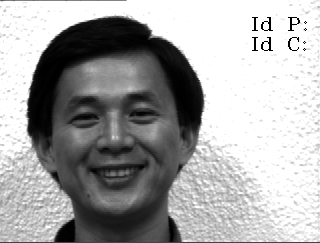

In [48]:
cv2.putText(image_array, 'Id P: ' + str(id_predicted), (250, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255, 0))
cv2.putText(image_array, 'Id C: ' + str(id_correct), (250, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255, 0))

cv2_imshow(image_array)

In [57]:
recognised_images = []

image_dir = '/content/yalefaces/test'

list_images = []

for file_name in os.listdir(image_dir):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        caminho_completo = os.path.join(image_dir, file_name)

        imagem = Image.open(caminho_completo)
        list_images.append(imagem)


for image in list_images:
    image_array = np.array(image.convert('L'), 'uint8')

    id_predicted, _ = face_recogniser.predict(image_array)

    id_correct = int(os.path.split(image.filename)[1].split('.')[0].replace('subject', ''))

    cv2.putText(image_array, 'P: ' + str(id_predicted), (250, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
    cv2.putText(image_array, 'C: ' + str(id_correct), (250, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))

    recognised_images.append(image_array)


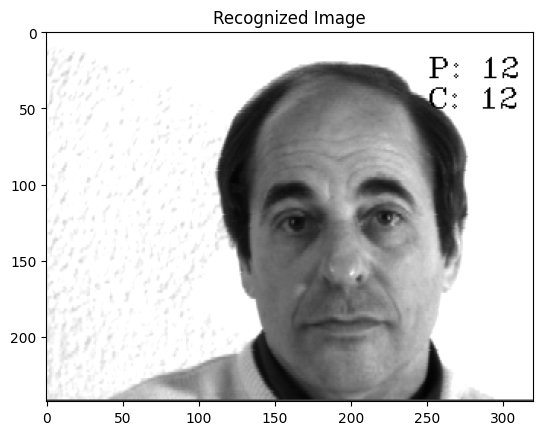

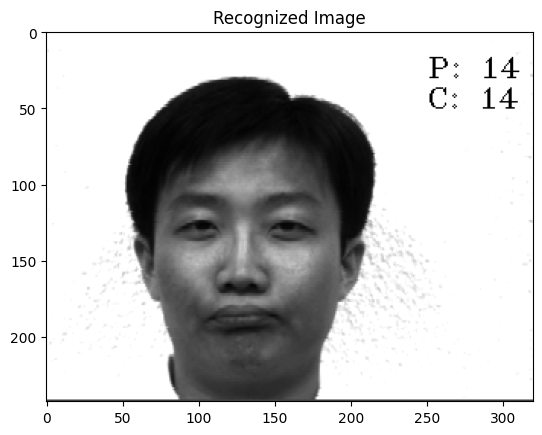

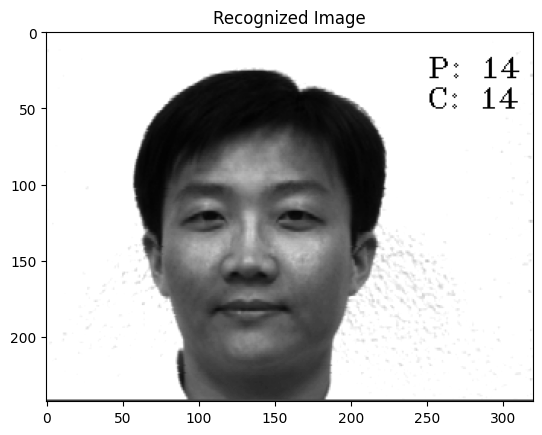

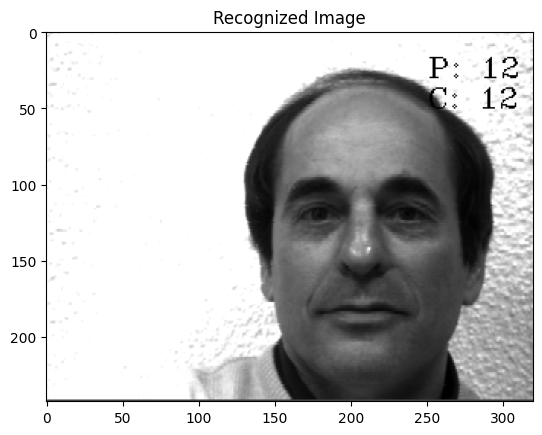

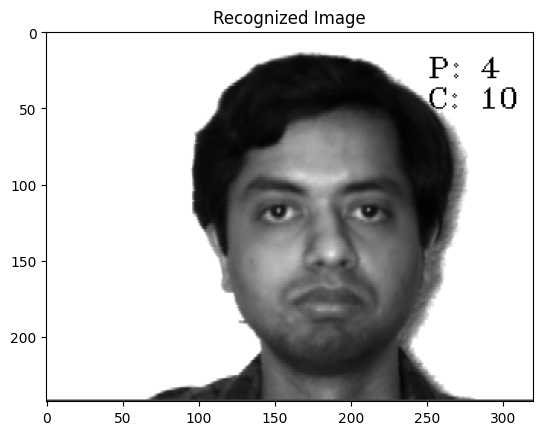

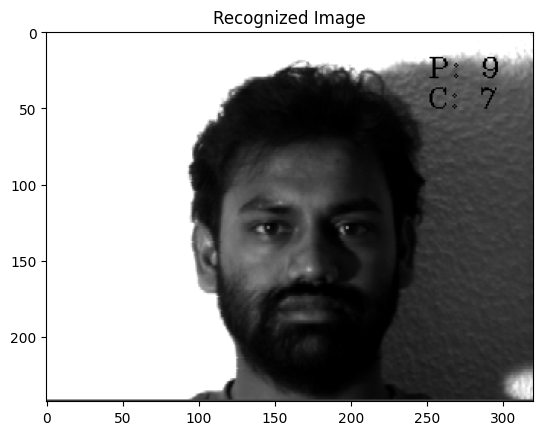

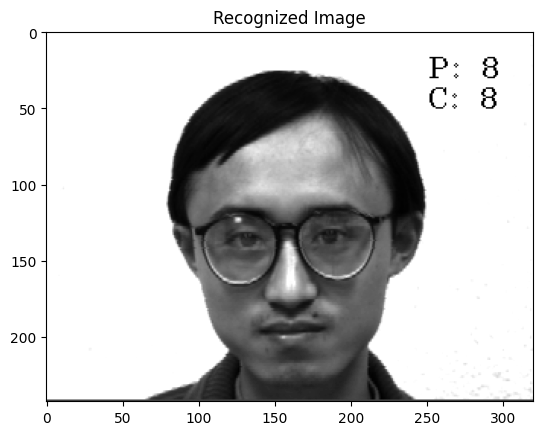

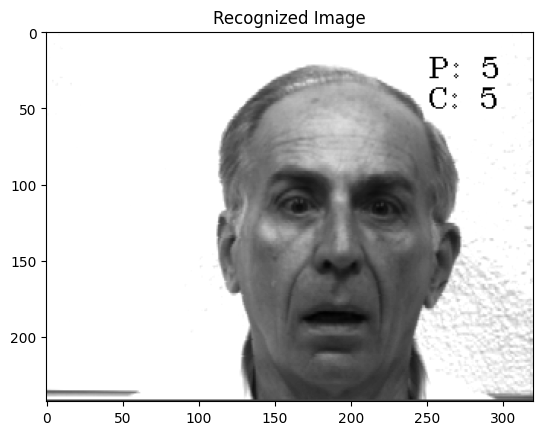

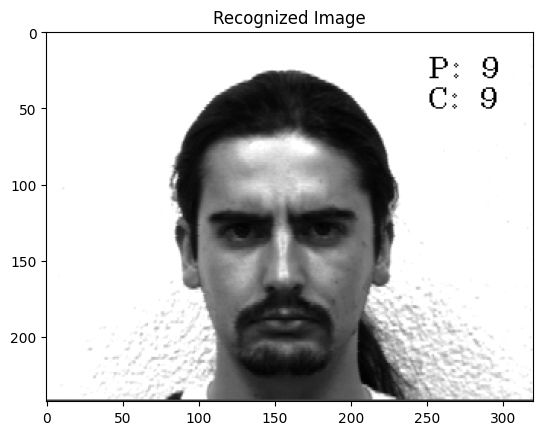

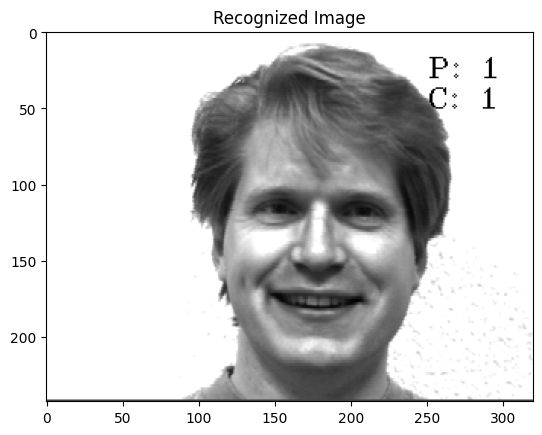

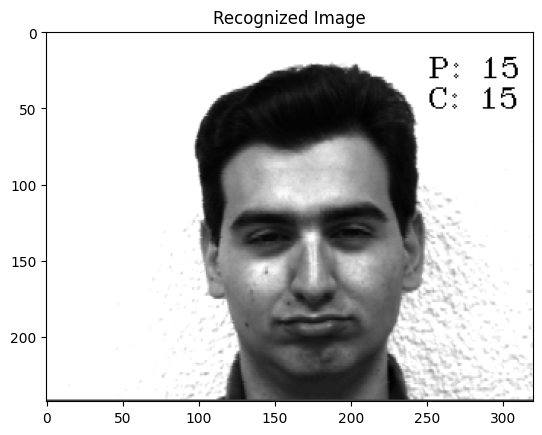

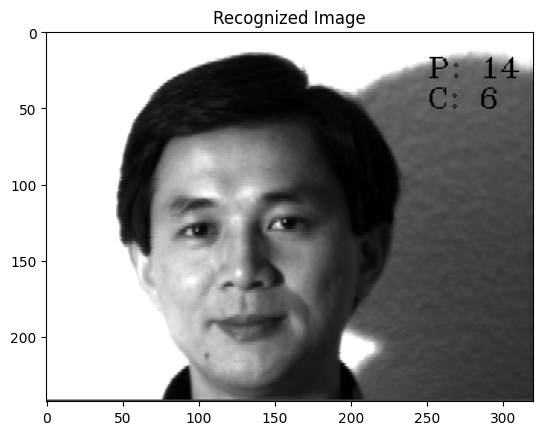

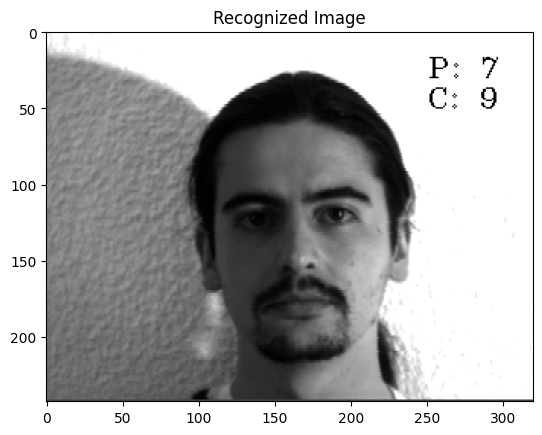

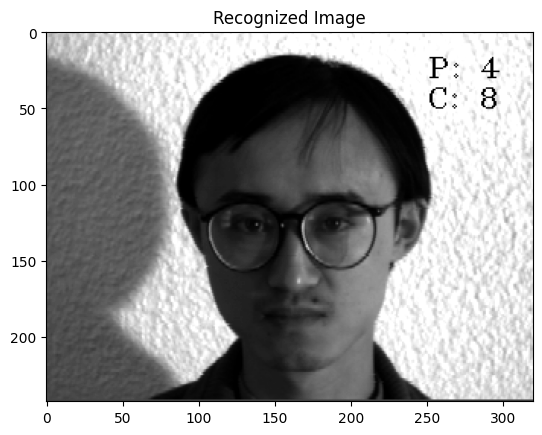

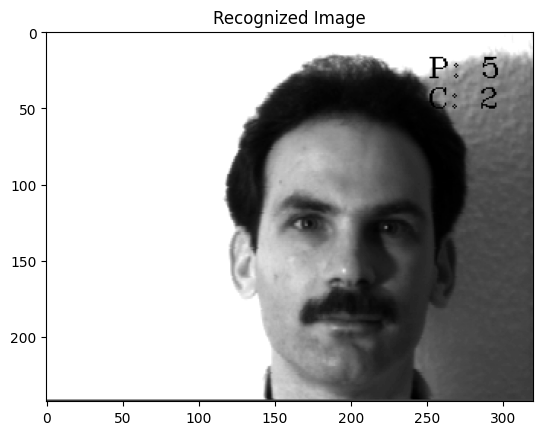

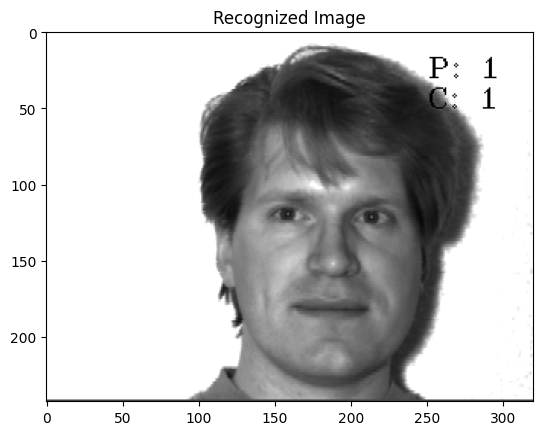

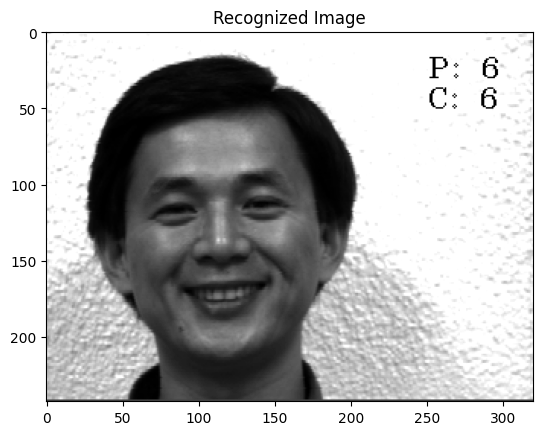

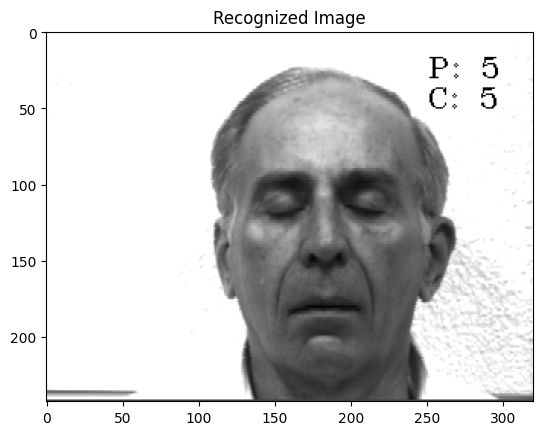

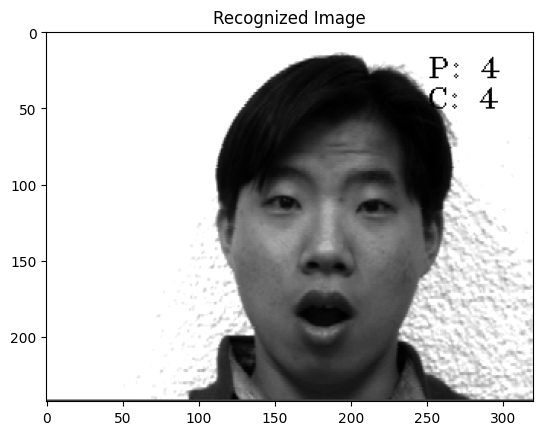

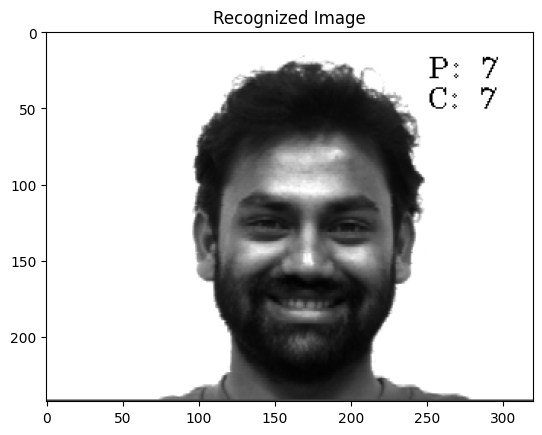

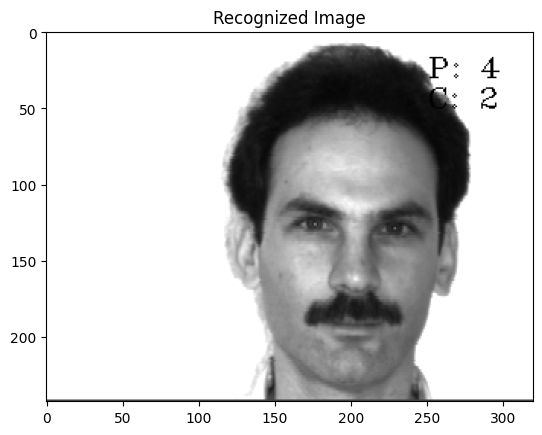

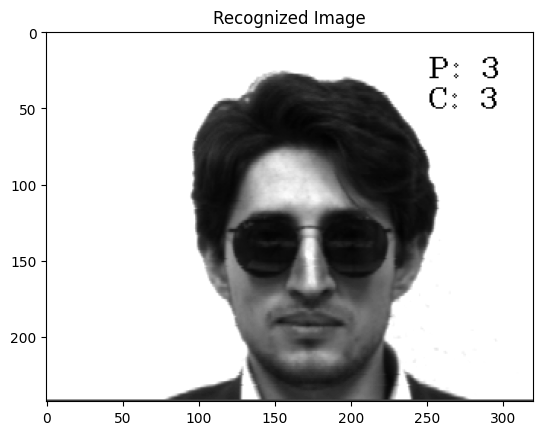

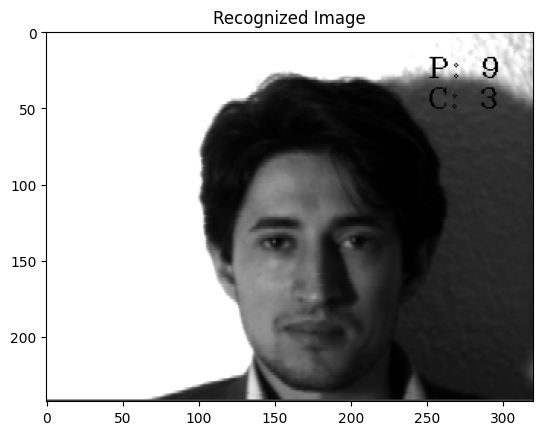

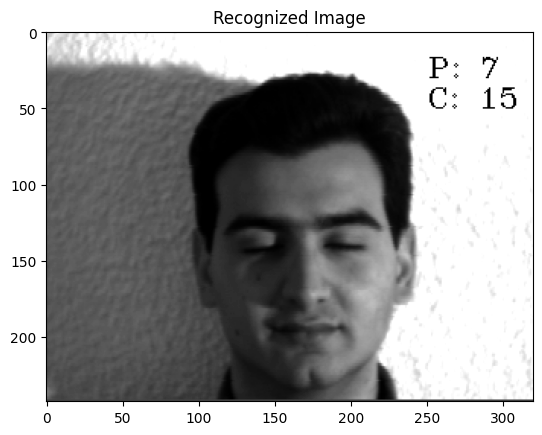

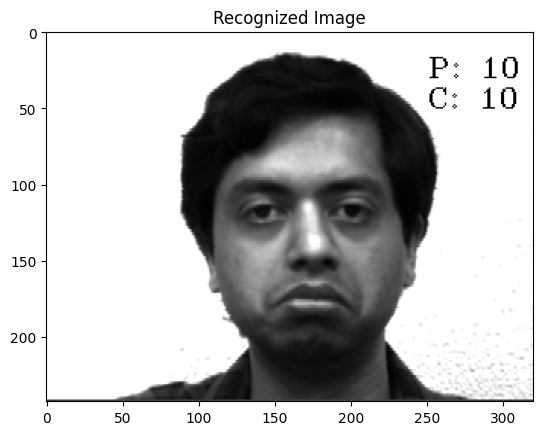

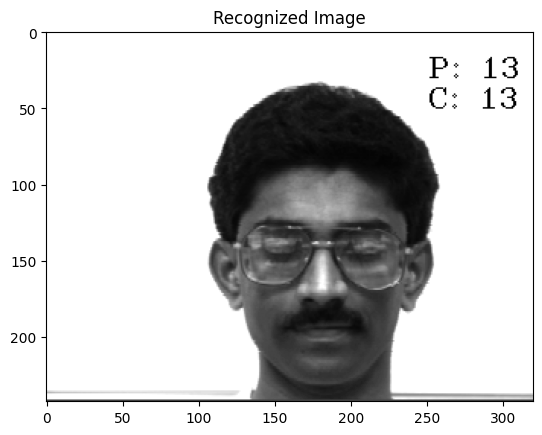

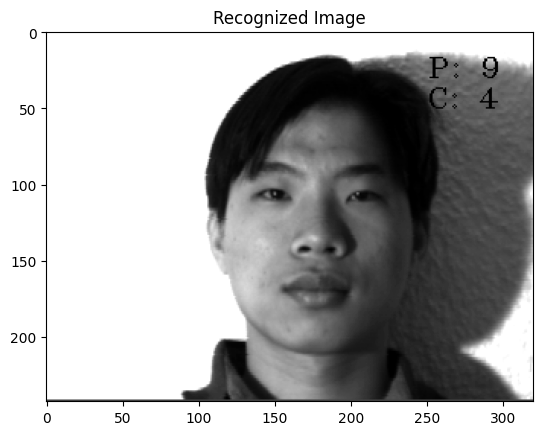

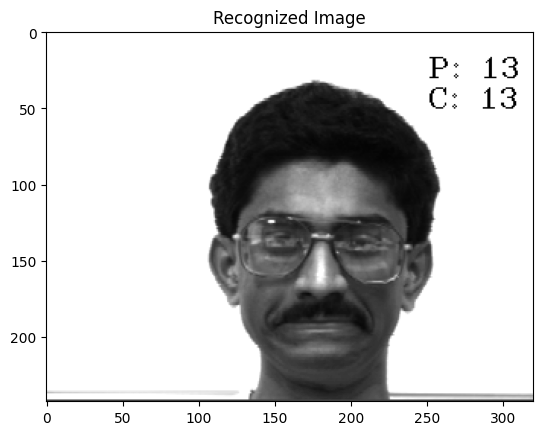

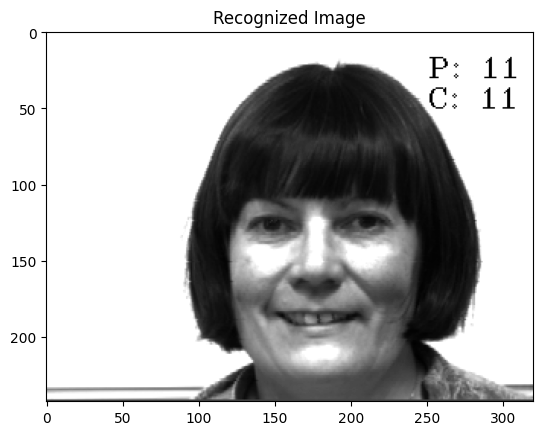

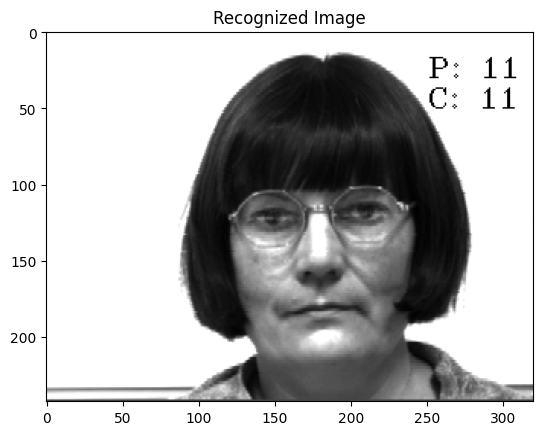

In [58]:
for recognized_image in recognised_images:
    plt.imshow(recognized_image, cmap='gray')
    plt.title('Recognized Image')
    plt.show()

## Analisando o Desempenho do Modelo

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

ids_previstos = [int(image[30, 250]) for image in recognised_images]
ids_corretos = [int(image[50, 250]) for image in recognised_images]

matriz_confusao = confusion_matrix(ids_corretos, ids_previstos)

total_acertos = np.trace(matriz_confusao)
total_erros = np.sum(matriz_confusao) - total_acertos

precisao = accuracy_score(ids_corretos, ids_previstos)

print(f'Total de Acertos: {total_acertos}')
print(f'Total de Erros: {total_erros}')
print(f'Precisão: {precisao * 100:.2f}%')

Total de Acertos: 17
Total de Erros: 13
Precisão: 56.67%


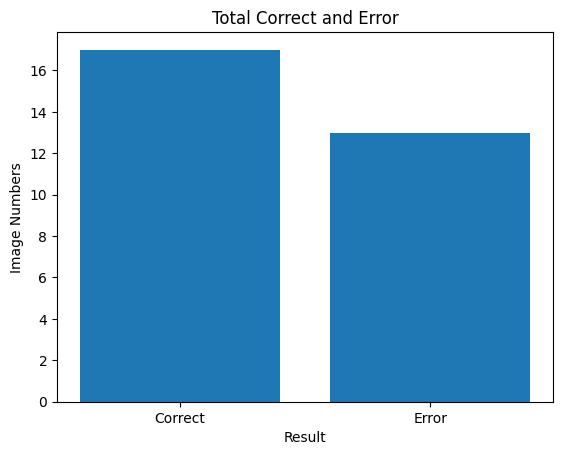

In [64]:
total_acertos = np.trace(matriz_confusao)
total_erros = np.sum(matriz_confusao) - total_acertos

plt.bar(['Correct', 'Error'], [total_acertos, total_erros])
plt.xlabel('Result')
plt.ylabel('Image Numbers')
plt.title('Total Correct and Error')
plt.show()

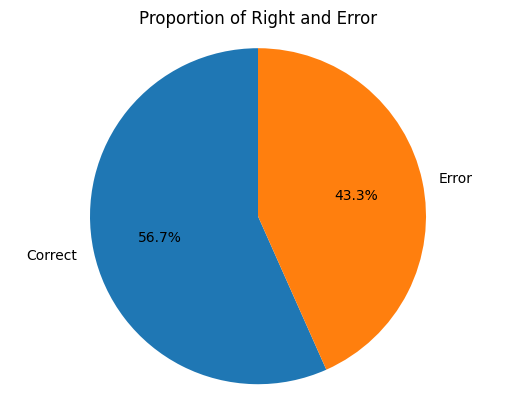

In [66]:
plt.pie([total_acertos, total_erros], labels=['Correct', 'Error'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Right and Error')
plt.show()

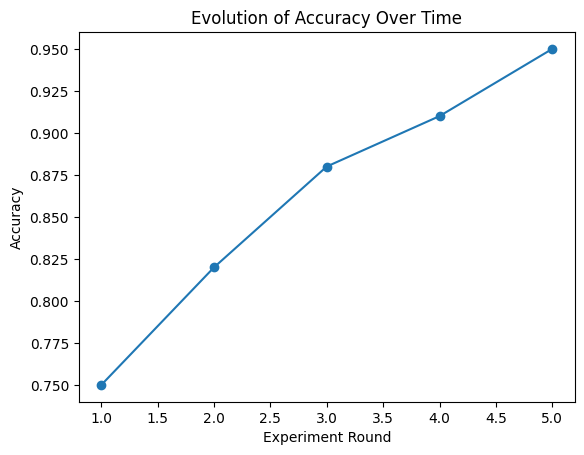

In [69]:
precisoes = [0.75, 0.82, 0.88, 0.91, 0.95]

plt.plot(range(1, len(precisoes) + 1), precisoes, marker='o')
plt.xlabel('Experiment Round')
plt.ylabel('Accuracy')
plt.title('Evolution of Accuracy Over Time')
plt.show()